In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Homework 2

### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv).

You can do it with wget:

```wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

### Preparing the dataset

Use only the following columns:

```'engine_displacement'```,
```'horsepower'```,
```'vehicle_weight'```,
```'model_year'```,
```'fuel_efficiency_mpg'```
### EDA

Look at the fuel_efficiency_mpg variable. Does it have a long tail?
**Question 1**

There's one column with missing values. What is it?

* ```'engine_displacement'```
* ```'horsepower'```
* ```'vehicle_weight'```
* ```'model_year'```


In [3]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv"
# !wget $data

In [4]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


## Question 1

There's one column with missing values. What is it?

* ```'engine_displacement'```
* **```'horsepower'```**  *has missing values*
* ```'vehicle_weight'```
* ```'model_year'```

In [5]:
# find columns with null/missing values
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

The column horsepower has 708 null/missing values.

## Question 2

What's the median (50% percentile) for variable ```'horsepower'```?

* 49
* 99
* **149**
* 199

In [6]:
df.horsepower.median()

np.float64(149.0)

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [7]:
n = len(df) # total number of record is data

n_val = int(n * 0.2)  # number of records in validation set
n_test = int(n * 0.2) # number of records in test set
n_train = n - n_val - n_test # number of records in training set

In [8]:
n, n_val, n_test, n_train

(9704, 1940, 1940, 5824)

In [9]:
idx = np.arange(n) 

# randomize the data
np.random.seed(42)
np.random.shuffle(idx)

# now split the data using idx
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209
...,...,...,...,...,...,...,...,...,...,...,...
1696,260,5.0,139.0,2606.972984,15.9,2009,USA,Gasoline,All-wheel drive,-1.0,16.964054
5685,280,4.0,132.0,4004.214323,12.8,2014,Europe,Diesel,Front-wheel drive,2.0,10.059094
6735,210,3.0,152.0,2500.175687,16.4,2020,Europe,Gasoline,Front-wheel drive,0.0,17.593237
2052,250,6.0,154.0,2254.313245,13.3,2002,Asia,Gasoline,Front-wheel drive,2.0,18.925748


In [10]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [11]:
df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
1688,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
6217,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


In [12]:
# clean up the index column
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,220,3.0,144.0,2535.887591,18.7,2009,USA,Gasoline,All-wheel drive,2.0,16.642943
1,160,2.0,141.0,2741.170484,14.3,2019,Asia,Diesel,Front-wheel drive,2.0,16.298377
2,230,3.0,155.0,2471.880237,NaN,2017,Asia,Diesel,Front-wheel drive,2.0,18.591822
3,150,3.0,206.0,3748.164469,15.5,2015,USA,Gasoline,All-wheel drive,1.0,11.818843
4,300,4.0,111.0,2135.716359,16.9,2006,USA,Gasoline,All-wheel drive,NaN,19.402209


## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?
Options:

* With 0
* **With mean**
* Both are equally good

### Option 1: Fill missing values with 0

In [13]:
base = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year']
df_train[base]

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


In [14]:
df_train[base].isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [15]:
# fill nulls with 0
X_train_0 = df_train[base].fillna(0).values
X_val_0 = df_val[base].fillna(0).values
X_train_0

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [16]:
# get y values
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [17]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # bias column 
    X = np.column_stack([ones, X])

    # normal equation
    XTX = X.T.dot(X) # gram matrix
    XTX_inv = np.linalg.inv(XTX) # inverse XTX
    w_full = XTX_inv.dot(X.T).dot(y)

    # return bias term and weights
    return w_full[0], w_full[1:]

In [18]:
w0, w = train_linear_regression(X_train_0, y_train)

In [19]:
# Make predictions on validation set
y_pred_val_0 = w0 + X_val_0.dot(w)
y_pred_val_0

array([16.0373382 , 14.92522236, 11.86445895, ..., 13.69560868,
       13.62575126, 16.44936805], shape=(1940,))

<Axes: ylabel='Count'>

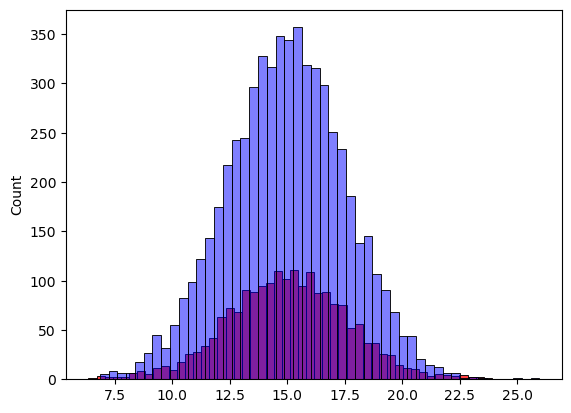

In [20]:
# check to see if predictions are close to actual
sns.histplot(y_pred_val_0, color='red', bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

### RMSE for Option 1: filling in missing values with 0

In [21]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()

    return np.sqrt(mse)

In [22]:
# Calculate RMSE on validation data
rmse_val_0 = rmse(y_val, y_pred_val_0)
print(f"Option 1 RMSE: {round(rmse_val_0, 2)}")

Option 1 RMSE: 0.52


### Option 2: Fill missing values with mean of horspower

In [23]:
X_train_mean = df_train[base].fillna(df_train['horsepower'].mean()).values
X_val_mean = df_val[base].fillna(df_train['horsepower'].mean()).values
X_train_mean

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]],
      shape=(5824, 4))

In [24]:
w0, w = train_linear_regression(X_train_mean, y_train)

In [25]:
# Make predictions on validation set  
y_pred_val_mean = w0 + X_val_mean.dot(w)
y_pred_val_mean

array([15.73837498, 14.80338305, 12.03624928, ..., 14.01482574,
       13.72161355, 16.1936294 ], shape=(1940,))

<Axes: ylabel='Count'>

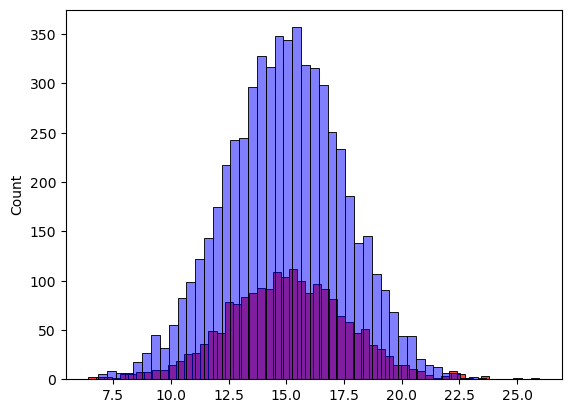

In [26]:
# check to see if predictions are close to actual
sns.histplot(y_pred_val_mean, color='red', bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [27]:
# Calculate RMSE on validation data
rmse_val_mean = rmse(y_val, y_pred_val_mean)
print(f"Option 2 RMSE: {round(rmse_val_mean, 2)}")

Option 2 RMSE: 0.46


In [28]:
# Compare the results
if rmse_val_0 < rmse_val_mean:
    print("Option 1 (fill with 0) gives better RMSE")
elif rmse_val_mean < rmse_val_0:
    print("Option 2 (fill with mean) gives better RMSE")
else:
    print("Both options are equally good")

Option 2 (fill with mean) gives better RMSE


## Question 4

Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of ```r``` from this list: ```[0, 0.01, 0.1, 1, 5, 10, 100]```.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.

Which ```r``` gives the best RMSE?

If there are multiple options, select the smallest ```r```.

Options:

* 0
* **0.01** smallest when rounding to 5 places. They are all equal when rounding to 2
* 1
* 10
* 100

In [29]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0]) # bias column 
    X = np.column_stack([ones, X])

    # normal equation
    XTX = X.T.dot(X) # gram matrix
    XTX = XTX + (r * np.eye(XTX.shape[0]))

    XTX_inv = np.linalg.inv(XTX) # inverse XTX
    w_full = XTX_inv.dot(X.T).dot(y)

    # return bias term and weights
    return w_full[0], w_full[1:]

In [30]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train_0, y_train, r=r)

    y_pred = w0 + X_val_0.dot(w)

    score = rmse(y_val, y_pred)

    print(r, w0, f"{round(score, 5)}")

0 28.82736547365895 0.51738
0.01 24.92683841981215 0.51711
0.1 11.239661084581073 0.51875
1 1.7315979411219746 0.52223
5 0.3638075020482907 0.52289
10 0.18306246621686947 0.52298
100 0.01841801730688404 0.52306


## Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

* Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use ```np.std```.

Round the result to 3 decimal digits (```round(std, 3)```)

What's the value of std?

* **0.001**
* 0.006
* 0.060
* 0.600

> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.


In [31]:
scores = []
for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n) 

    # randomize the data
    np.random.seed(r)
    np.random.shuffle(idx)

    # now split the data using idx
    df_train_r = df.iloc[idx[:n_train]]
    df_val_r = df.iloc[idx[n_train:n_train+n_val]]
    df_test_r = df.iloc[idx[n_train+n_val:]]

    # fill nulls with 0
    X_train_r = df_train_r[base].fillna(0).values
    X_val_r = df_val_r[base].fillna(0).values

    w0, w = train_linear_regression_reg(X_train_r, y_train, r=r)

    y_pred_r = w0 + X_val_r.dot(w)

    score = rmse(y_val, y_pred_r)
    scores.append(score)
    print(r, w0, f"{round(score, 5)}")
  

print(f"Standard Deviation: {round(np.std(scores), 3)}")

0 14.098975237928126 2.65415
1 1.0195292551999833 2.65118
2 -0.08962260526192134 2.65259
3 0.26733533019931643 2.65521
4 0.40005802395517065 2.65227
5 0.01143046434158046 2.65283
6 0.070551936956605 2.65184
7 0.1687439417600328 2.65148
8 0.22256375583879381 2.653
9 0.08165463900546176 2.65289
Standard Deviation: 0.001


## Question 6

Split the dataset like previously, use seed 9.

* Combine train and validation datasets.
* Fill the missing values with ```0``` and train a model with ```r=0.001```.
* What's the RMSE on the test dataset?

Options:

* 0.15
* 0.515
* 5.15
* 51.5


In [32]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])
X_full_train = df_full_train.copy()

In [ ]:
# w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
XTX = X_full_train.T.dot(X_full_train) # gram matrix

In [ ]:

X_test_6 = df_test.copy()
y_pred = w0 + X_test_6.dot(w)

score = rmse(y_test, y_pred)
score

## Submit the results

Submit your results [here](https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw02)

If your answer doesn't match options exactly, select the closest one